### Importation of dependencies

Green: electricitiy
Red: Gas

In [1]:
from sp_ql import Engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt

In [551]:
project = 'NSI' #change to Merin
engine=Engine(project=project, isAsync=False)
bms_registers = engine.list().filter(unit='CELCIUS').all()
build_names = bms_registers['keyname_01'].unique()
build_names = build_names[~pd.isna(build_names)]

In [552]:
eans=pd.read_csv(f'/Users/Matt/Desktop/MSc/Thesis/Spectral/brighter_eda/inputs/eans/{project.lower()}_eans.csv')
#extraction of unique keyname_01 and EAN for electricity
electr_eans=eans[eans['Contract Type']=='Electricity']
electr_eans=electr_eans[['keyname_01', 'EAN']].dropna().set_index('keyname_01').squeeze()

#extraction of unique keyname_01 and EAN for gas
gas_eans=eans[eans['Contract Type']=='Natural Gas']
gas_eans=gas_eans[['keyname_01', 'EAN']].dropna().set_index('keyname_01').squeeze()

#adds missing buildings
for building in build_names:
    if building not in electr_eans.index:
        electr_eans[building]=np.nan
    if building not in gas_eans.index:
        gas_eans[building]=np.nan

In [553]:
electr_eans

keyname_01
AVS_UTR     871687400002070169
BENNEK41    871687120101437013
DIEMEN      871685900041463042
FOKKERWG    871687110003152206
FOKKERWG    871685920003136524
FOKKERWG    871685920003031850
FOKKERWG    871685920002948081
FOKKERWG    871685920002948074
FOKKERWG    871685920002622455
FOKKERWG    871685920002527965
FOKKERWG    871685920001218970
FOKKERWG    871685900001613319
FOKKERWG    871685900000028770
P2639       871685920001040564
P2639       871685920000924148
P2639       871685900000028947
PARI_ADM    871685900100697869
PARI_ADM    871685900041466814
RADPAMS                    NaN
R003331                    NaN
P163063                    NaN
ROME_ADM                   NaN
Name: EAN, dtype: object

### Electricity & Gas EANS

In [554]:
eans=pd.read_csv(f'/Users/Matt/Desktop/MSc/Thesis/Spectral/brighter_eda/inputs/eans/{project.lower()}_eans.csv')
#extraction of unique keyname_01 and EAN for electricity
electr_eans=eans[eans['Contract Type']=='Electricity']
electr_eans=electr_eans[['keyname_01', 'EAN']].dropna().set_index('keyname_01').squeeze()

#extraction of unique keyname_01 and EAN for gas
gas_eans=eans[eans['Contract Type']=='Natural Gas']
gas_eans=gas_eans[['keyname_01', 'EAN']].dropna().set_index('keyname_01').squeeze()

#adds missing buildings
for building in build_names:
    if building not in electr_eans.index:
        electr_eans[building]=np.nan
    if building not in gas_eans.index:
        gas_eans[building]=np.nan
        
#manually adding electricity eans
#Sint Jacobsstraat
try:
    del electr_eans['R003331'] #delets the row for keyname_01 as no data from pulling csv file
    electr_eans=electr_eans.append(pd.Series(index=['R003331']*9, #adds 9 new instances
                                           data=['871687400001086666',
                                                 '871687400001086802',
                                                 '871687400002056224',
                                                 '871687400002056231',
                                                 '871687400008697070',
                                                 '871687400009144542',
                                                 '871687460009454539',
                                                 '871687460011423080',
                                                 '871687460011724569']))
    
except KeyError:
    print()
    
#Radarweg
try:
    del electr_eans['RADPAMS'] #delets the row for keyname_01 as no data from pulling csv file
    electr_eans = electr_eans.append(pd.Series(index=['RADPAMS']*3,
                                               data=['871685900000027582',
                                                 '871685900000053857',
                                                 '871689276000027829'])) 
except KeyError:
    print()
    
#Derkinderenstraat
try:
    del electr_eans['P163063'] #delets the row for keyname_01 as no data from pulling csv file
    electr_eans = electr_eans.append(pd.Series(index=['P163063']*3,
                                               data=['871685900000028947',
                                                 '871685920000924148',
                                                 '871685920001040564']))
except KeyError:
    print()
    
#Burg_stramanweg_107
try:
    del electr_eans['ROME_ADM'] #delets the row for keyname_01 as no data from pulling csv file
    electr_eans = electr_eans.append(pd.Series(index=['ROME_ADM'],
                                               data=['871685900000033477']))
except KeyError:
    print()
    
#manually adding gas EANS
#Derkinderenstraat
try:
    del gas_eans['P163063']
    gas_eans = gas_eans.append(pd.Series(index=['P163063'],
                                                data=['871687140000067876']))
except KeyError:
    print()
    
#Burg_stramanweg_107
try:
    del gas_eans['ROME_ADM']
    gas_eans = gas_eans.append(pd.Series(index=['ROME_ADM'],
                                         data=['871687140007494125']))
except KeyError:
    print()
    
#Radarweg
try:
    del gas_eans['RADPAMS'] # has heat EAN, no gas EANs
except KeyError:
    print()
    
#Sint Jacobsstraat
try:
    del gas_eans['R003331'] # has heat EAN, no gas EANs
except KeyError:
    print()
    
socs = pd.read_csv(r'/Users/Matt/Desktop/MSc/Thesis/Spectral/brighter_eda/inputs/start_of_control/start_of_control_dates.csv')
socs = socs[socs['project']==project]
socs = socs.set_index('keyname_01')['soc_date'].squeeze()
socs = pd.to_datetime(socs)

data_periods = pd.DataFrame()
data_periods['start'] = socs[build_names] - dt.timedelta(days=365)
data_periods['end'] = dt.datetime(2022, 2, 1)

/var/folders/dm/4y72cbm579q8j850rq4h88pm0000gn/T/ipykernel_48302/2629120052.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  electr_eans=electr_eans.append(pd.Series(index=['R003331']*9, #adds 9 new instances
/var/folders/dm/4y72cbm579q8j850rq4h88pm0000gn/T/ipykernel_48302/2629120052.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  electr_eans = electr_eans.append(pd.Series(index=['RADPAMS']*3,
/var/folders/dm/4y72cbm579q8j850rq4h88pm0000gn/T/ipykernel_48302/2629120052.py:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  electr_eans = electr_eans.append(pd.Series(index=['P163063']*3,
/var/folders/dm/4y72cbm579q8j850rq4h88pm0000gn/T/ipykernel_48302/2629120052.py:58: FutureWarning: The series.append method is depre

## Gas and Electricity Data Pull

In [555]:
data_periods = pd.DataFrame()
data_periods['start'] = socs[build_names] - dt.timedelta(days=365)
data_periods['end'] = dt.datetime(2022, 2, 1)

In [557]:
#checks time frequency for which data is stored for one electricity EAN
engine.select('871687400002070169').after(start).before(end).all()

,871687400002070169
2020-12-15 00:00:00,11.100000
2020-12-15 00:15:00,11.000000
2020-12-15 00:30:00,11.300000
2020-12-15 00:45:00,11.000000
2020-12-15 01:00:00,11.100000
...,...
2022-01-31 22:45:00,42.799999
2022-01-31 23:00:00,42.799999
2022-01-31 23:15:00,44.400002
2022-01-31 23:30:00,42.799999


In [556]:
electr_eans

AVS_UTR     871687400002070169
BENNEK41    871687120101437013
DIEMEN      871685900041463042
FOKKERWG    871687110003152206
FOKKERWG    871685920003136524
FOKKERWG    871685920003031850
FOKKERWG    871685920002948081
FOKKERWG    871685920002948074
FOKKERWG    871685920002622455
FOKKERWG    871685920002527965
FOKKERWG    871685920001218970
FOKKERWG    871685900001613319
FOKKERWG    871685900000028770
P2639       871685920001040564
P2639       871685920000924148
P2639       871685900000028947
PARI_ADM    871685900100697869
PARI_ADM    871685900041466814
R003331     871687400001086666
R003331     871687400001086802
R003331     871687400002056224
R003331     871687400002056231
R003331     871687400008697070
R003331     871687400009144542
R003331     871687460009454539
R003331     871687460011423080
R003331     871687460011724569
RADPAMS     871685900000027582
RADPAMS     871685900000053857
RADPAMS     871689276000027829
P163063     871685900000028947
P163063     871685920000924148
P163063 

### Electricity use data

In [571]:
## get electr use data
engine = Engine(project=project, isAsync=False)
time_res = 'h' # hourly
electr_use = pd.DataFrame(index=pd.date_range(start=data_periods['start'].min(),
                                              end=data_periods['end'].max(),
                                              freq=time_res))

# pulls data from sp-ql
for building in build_names:
    start = data_periods.loc[building, 'start']
    end = data_periods.loc[building, 'end']
    electr_ean = electr_eans[building]
    if isinstance(electr_ean, str):
        electr = engine.select(electr_ean).group_by(time_res).mean().after(start).before(end).all() #the result is now kW power in hourly resolution, which is numerically identical to the hourly kWh value
        if len(electr) > 0:
            electr = electr.rename(columns={electr.columns[0]:fr'{building}_{electr.columns[0]}'})
            electr_use = electr_use.join(electr)
        #else:
            #print(fr'{building} - electricity EAN:{electr_eans[building]} not found')
    else:
        for ean in electr_ean:
            electr = engine.select(ean).group_by(time_res).mean().after(start).before(end).all()
            if len(electr) > 0:
                electr = electr.rename(columns={electr.columns[0]:fr'{building}_{electr.columns[0]}'})
                electr_use = electr_use.join(electr)
            #else:
                #print(fr'{building} - electricity EAN:{ean} not found')

### Electricity Plot

In [570]:
#multiple electricity EANs per builings, add them together to find total consumption per building
electr_use.columns

Index(['RADPAMS_871685900000027582', 'RADPAMS_871689276000027829',
       'DIEMEN_871685900041463042', 'FOKKERWG_871685900000028770',
       'BENNEK41_871687120101437013', 'R003331_871687400001086802',
       'R003331_871687400002056224', 'R003331_871687400002056231',
       'R003331_871687400008697070', 'R003331_871687400009144542',
       'AVS_UTR_871687400002070169', 'P163063_871685900000028947',
       'P2639_871685900000028947', 'ROME_ADM_871685900000033477',
       'PARI_ADM_871685900041466814'],
      dtype='object')

# START OF EDIT

## Electricity usage discovery per building

### 1. RADPAMS (2 EANs)

### Data aggregation of building with multiple electricity EANs

In [573]:
filter_col = [col for col in electr_use if col.startswith('RADPAMS')] #filters the buildings that start with input name
electr_use[filter_col]=electr_use[filter_col].fillna(0) #adds 0's for NaN's for summation of electricity usage
electr_use['RADPAMS_ALL']=electr_use[filter_col].sum(axis=1) #summation of all buildings with name filter
electr_use['RADPAMS_ALL']=electr_use['RADPAMS_ALL'].replace({'0':np.nan, 0:np.nan}) #replacing the 0's back for NaN's

Text(0, 0.5, 'kWh')

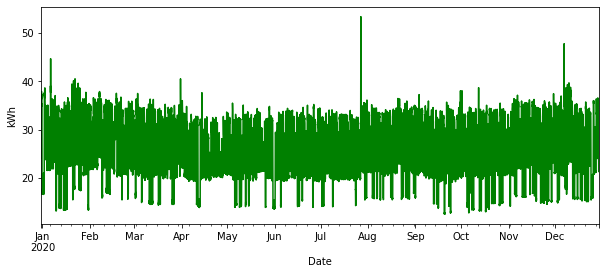

In [622]:
#finds first index where there isn't a NaN
index=electr_use['RADPAMS_ALL'].index.get_loc(electr_use['RADPAMS_ALL'].first_valid_index())
#subscript of first chunk of readings that are significantly lower
ax=electr_use['RADPAMS_ALL'].iloc[index-1:(index+(24*365))]
#plot from first non-NaN to end of cycle
ax2=electr_use['RADPAMS_ALL'].iloc[index-1:,]
ax3=electr_use['RADPAMS_ALL'].iloc[index-1:(index+(24*7))]
ax.plot(figsize=(10,4), color='green') #plot for which data peaks
#plt.title("Hourly energy consumption - kWh")
plt.xlabel("Date")
plt.ylabel("kWh")

Text(0, 0.5, 'kWh')

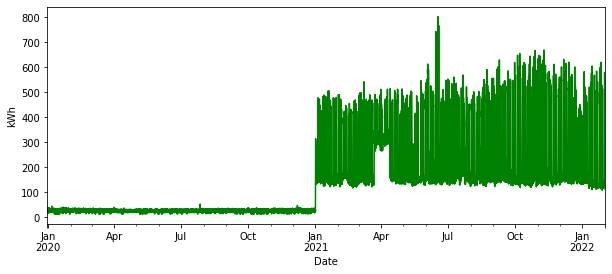

In [623]:
ax2.plot(figsize=(10,4), color='green') #plot for whole data period
#plt.title("Hourly energy consumption - kWh")
plt.xlabel("Date")
plt.ylabel("kWh")

Text(0, 0.5, 'kWh')

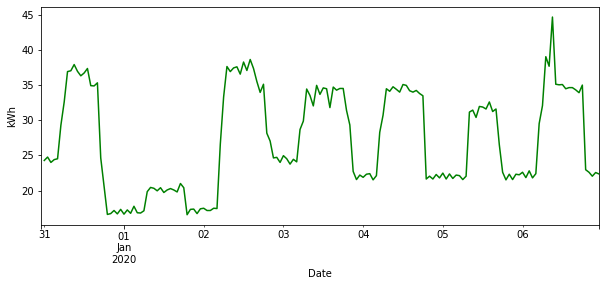

In [624]:
ax3.plot(figsize=(10,4), color='green') #plot for whole data period
#plt.title("Hourly energy consumption - kWh")
plt.xlabel("Date")
plt.ylabel("kWh")

### 2. R003331 (5 EANs)

### Data aggregation of building with multiple electricity EANs

In [265]:
filter_col = [col for col in electr_use if col.startswith('R003331')]
electr_use[filter_col]=electr_use[filter_col].fillna(0)
electr_use['R003331_ALL']=electr_use[filter_col].sum(axis=1)
electr_use['R003331_ALL']=electr_use['R003331_ALL'].replace({'0':np.nan, 0:np.nan})

<AxesSubplot:>

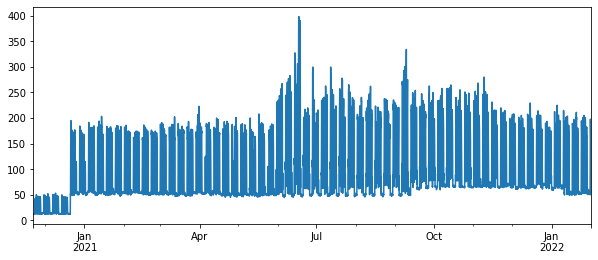

In [266]:
index=electr_use['R003331_ALL'].index.get_loc(electr_use['R003331_ALL'].first_valid_index())
ax=electr_use['R003331_ALL'].iloc[index-1:,]
ax.plot(figsize=(10,4))

In [267]:
#aliasing old electr_use dataframe 
electr_use_updated=pd.DataFrame
electr_use_updated=electr_use
electr_use_updated=electr_use_updated.drop(['RADPAMS_871685900000027582', 'RADPAMS_871689276000027829','R003331_871687400001086802',
                 'R003331_871687400002056224', 'R003331_871687400002056231', 'R003331_871687400008697070', 'R003331_871687400009144542'], axis=1) #drops columns now grouped

In [268]:
#output of updated electr_use components 
for i in sorted(electr_use_updated.columns):
    print(i)

AVS_UTR_871687400002070169
BENNEK41_871687120101437013
DIEMEN_871685900041463042
FOKKERWG_871685900000028770
P163063_871685900000028947
P2639_871685900000028947
PARI_ADM_871685900041466814
R003331_ALL
RADPAMS_ALL
ROME_ADM_871685900000033477


### Electricity consumption from first recored point after row!=NaN for all buildings

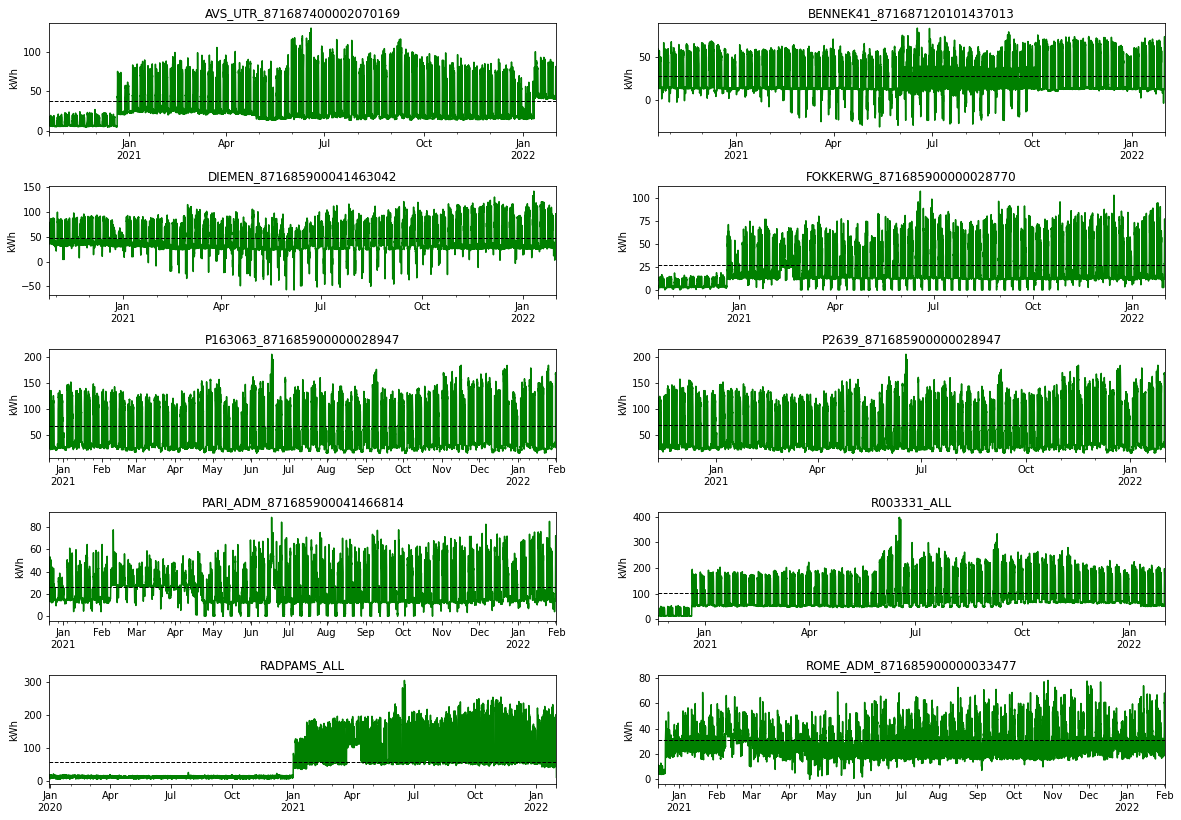

In [632]:
average=0 #pre-definition 
averages={}
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 14))
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("Electricity consumption for all buildings, client: NSI", fontsize=12, y=0.95)
for col, ax in zip(sorted(electr_use_updated.columns), axs.ravel()):
    index=electr_use_updated[[col]].index.get_loc(electr_use_updated[[col]].first_valid_index())
    electr_use_updated[[col]].iloc[index-1:,].plot(ax=ax, color='green')
    average=electr_use_updated[col].iloc[index-1:,].mean()
    averages[col[0:3]]=average
    ax.axhline(average, ls='--', c='k', lw=1) 
    ax.set_title(col.upper()) #col[0:3] for abbreviation
    ax.get_legend().remove()
    ax.set_ylabel("kWh")
plt.show()

### Shows average hourly electr-consumption (kWh) of buildings from first day reading was made

Text(0, 0.5, 'kWh')

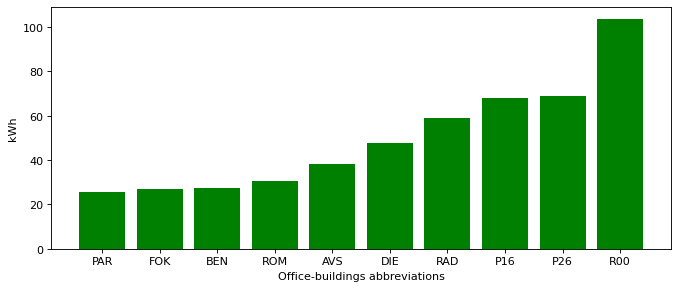

In [625]:
figure(figsize=(10, 4), dpi=80)
vals=dict(sorted(averages.items(), key=lambda item: item[1]))
plt.bar(*zip(*vals.items()), color='green')
#plt.title("Average hourly energy consumption, per office-building (NSI)")
plt.xlabel("Office-buildings abbreviations")
plt.ylabel("kWh")

In [ ]:
#check the meta_data for R00, how many square feet does it have?

### Subscript from Jan-21 to Feb-22

In [278]:
electr_use_updated.columns

Index(['DIEMEN_871685900041463042', 'FOKKERWG_871685900000028770',
       'BENNEK41_871687120101437013', 'AVS_UTR_871687400002070169',
       'P163063_871685900000028947', 'P2639_871685900000028947',
       'ROME_ADM_871685900000033477', 'PARI_ADM_871685900041466814',
       'RADPAMS_ALL', 'R003331_ALL'],
      dtype='object')

DIEMEN_871685900041463042 and BENNEK41_871687120101437013 have negative values because of PV generation. Here, meter data shows the sum of energy use (+) and energy generation (-)

### ELECTRICITY CONSUMPTION without GROUPED EAN buildings

<AxesSubplot:>

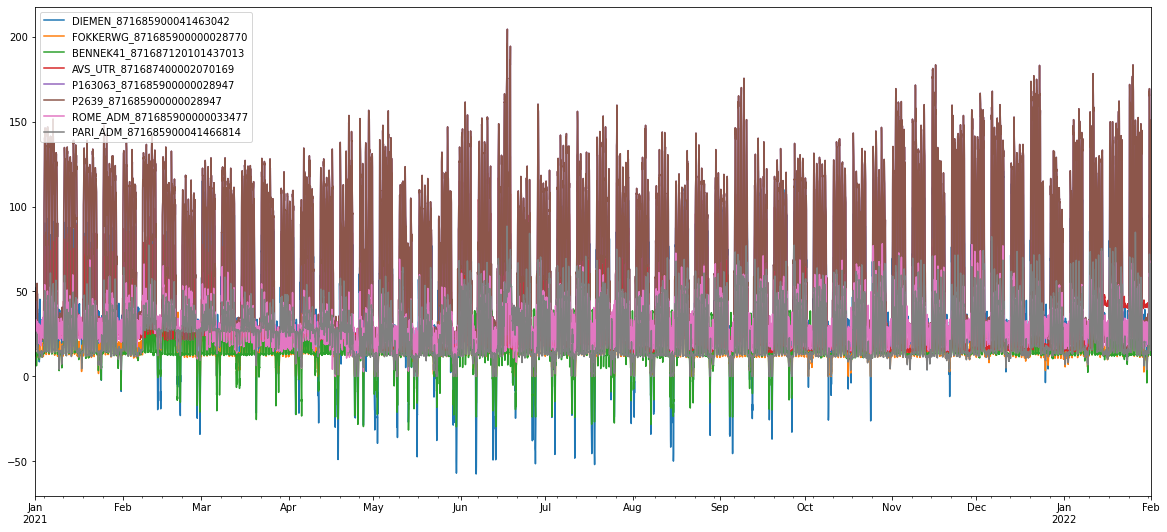

In [271]:
index=18384 #index for 2021-01-01
electr_use_updated.iloc[index:,].plot(y=[col for col in electr_use_updated if col!="RADPAMS_ALL" and col!="R003331_ALL"], figsize=(20,9))

### Electricity consumption without PV buildings: DIEMEN and BENNEK41

<AxesSubplot:>

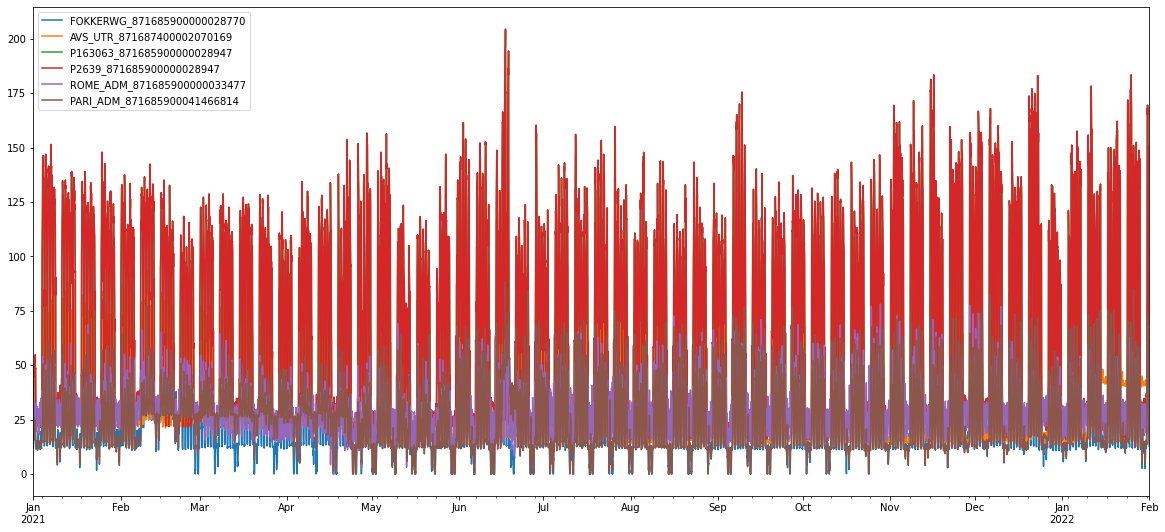

In [276]:
index=18384 #index for 2021-01-01
electr_use_updated.iloc[index:,].plot(y=[col for col in electr_use_updated if col!="RADPAMS_ALL" and col!="R003331_ALL"
                                        and col!="DIEMEN_871685900041463042" and col!="BENNEK41_871687120101437013"], figsize=(20,9))

### Electricity consumption for grouped EAN buildings

<AxesSubplot:>

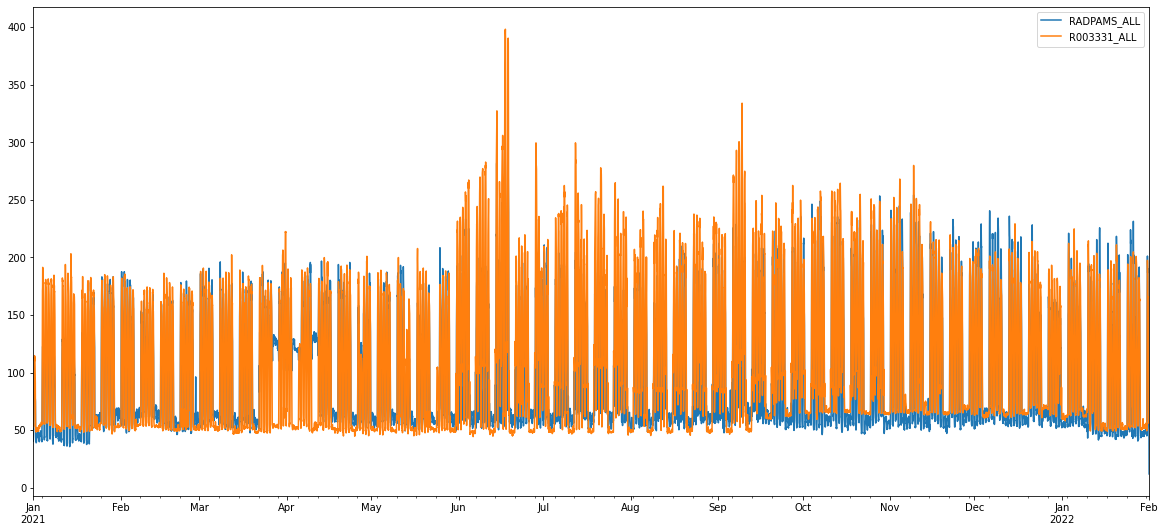

In [441]:
index=18384 #index for 2021-01-01
electr_use_updated.iloc[index:,].plot(y=[col for col in electr_use_updated[['RADPAMS_ALL','R003331_ALL']]], figsize=(20,9))

### Electricity consumption data for all buildings in pre-defined range

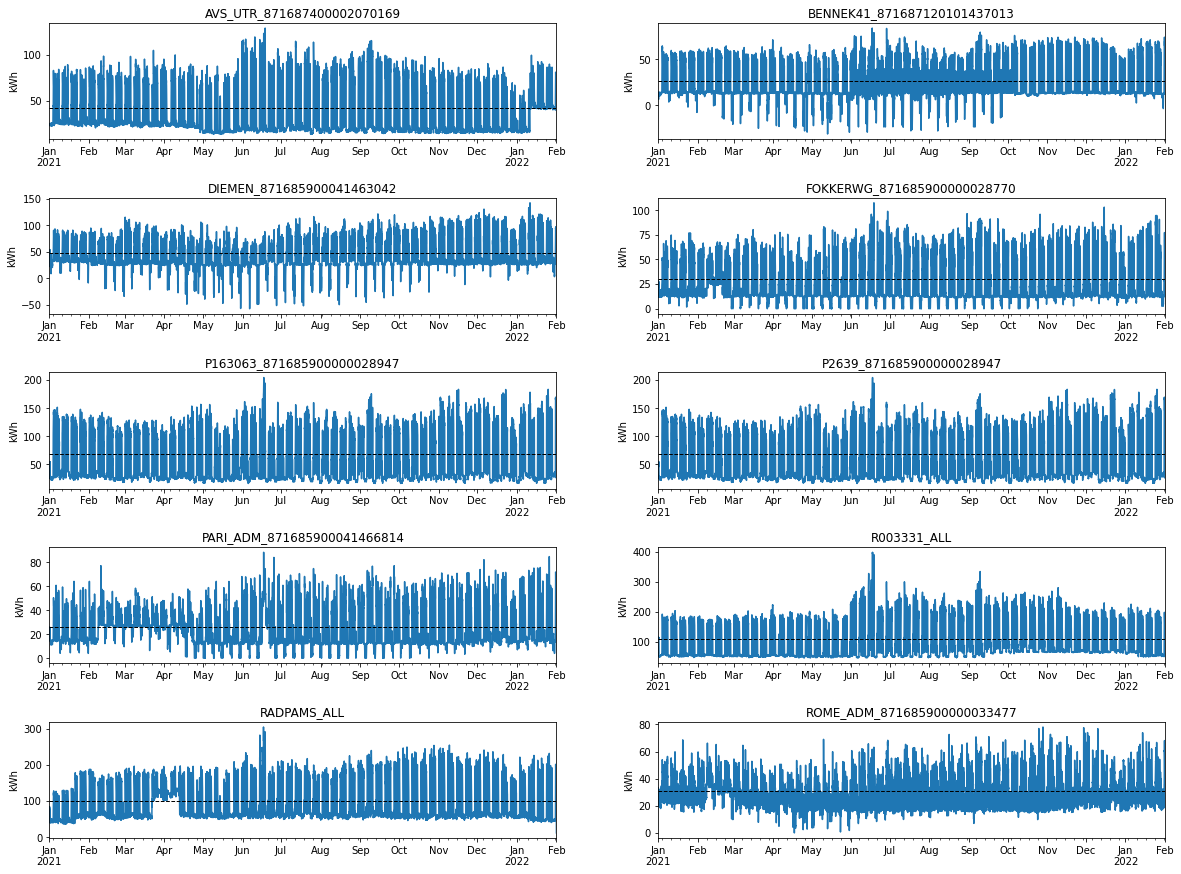

In [612]:
#super clean
index=18384 #index for 2021-01-01
average=0 #pre-definition 
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("Electricity consumption for all buildings", fontsize=12, y=0.95)
for col, ax in zip(sorted(electr_use_updated.columns), axs.ravel()):
    electr_use_updated[[col]].iloc[index:,].plot(ax=ax)
    average=electr_use_updated[col].iloc[index:,].mean()
    ax.axhline(average, ls='--', c='k', lw=1) 
    ax.set_title(col.upper())
    ax.get_legend().remove()
    ax.set_ylabel("kWh")
plt.show()

## Gas use data

In [504]:
build_names

array(['RADPAMS', 'DIEMEN', 'FOKKERWG', 'BENNEK41', 'R003331', 'AVS_UTR',
       'P163063', 'P2639', 'ROME_ADM', 'PARI_ADM'], dtype=object)

In [510]:
engine = Engine(project=project, isAsync=False)
time_res = 'h'
gas_use = pd.DataFrame(index=pd.date_range(start=data_periods['start'].min(),
                                              end=data_periods['end'].max(),
                                              freq=time_res))
# data from sp-ql
nogas_builds = ['RADPAMS', 'R003331']
for building in [b for b in build_names if b not in nogas_builds]:
    start = data_periods.loc[building, 'start']
    end = data_periods.loc[building, 'end']
    gas_ean = gas_eans[building]
    if isinstance(gas_ean, str):
        gas = engine.select(gas_ean).group_by(time_res).sum().after(start).before(end).all()
        if len(gas) > 0:
            gas = gas.rename(columns={gas.columns[0]:fr'{building}_{gas.columns[0]}'})
            gas_use = gas_use.join(gas)
        else:
            print(fr'{building} - gas EAN:{gas_eans[building]} not found')
    else:
        for ean in gas_ean:
            gas = engine.select(ean).group_by(time_res).sum().after(start).before(end).all()
            if len(gas) > 0:
                gas = gas.rename(columns={gas.columns[0]:fr'{building}_{gas.columns[0]}'})
                gas_use = gas_use.join(gas)
            else:
                print(fr'{building} - gas EAN:{ean} not found')

FOKKERWG - gas EAN:871687140022815233 not found
FOKKERWG - gas EAN:871687140014224159 not found


### Gas EDA

Text(0, 0.5, 'kWh')

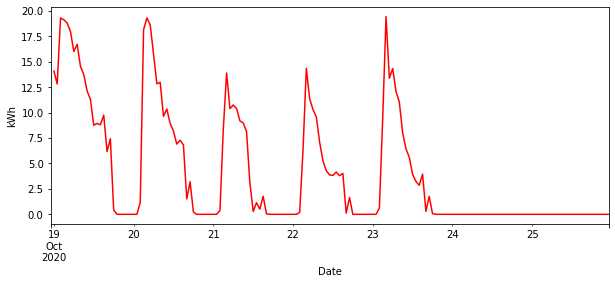

In [617]:
#finds first index where there isn't a NaN
index=gas_use['AVS_UTR_871689290604461476'].index.get_loc(gas_use['AVS_UTR_871689290604461476'].first_valid_index())
#subscript of first chunk of readings that are significantly lower
ax=gas_use['AVS_UTR_871689290604461476'].iloc[index-1:(index+(24*365))]
#plot from first non-NaN to end of cycle
ax2=gas_use['AVS_UTR_871689290604461476'].iloc[index-1:,]
ax3=gas_use['AVS_UTR_871689290604461476'].iloc[index-1:(index+(24*7))]
ax3.plot(figsize=(10,4), color='red') #plot for which data peaks
#plt.title("Hourly energy consumption - kWh")
plt.xlabel("Date")
plt.ylabel("kWh")

### Gas plot

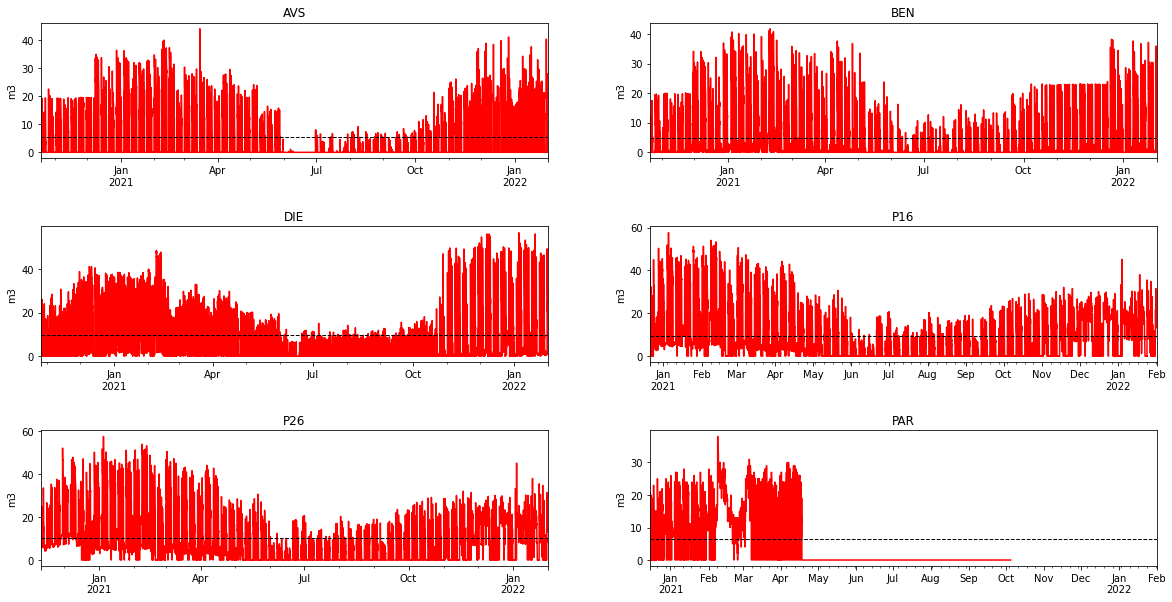

In [629]:
gas_use_updated=pd.DataFrame
gas_use_updated=[col for col in gas_use if col!="ROME_ADM_871687140007494125"] #no data for this fella

average=0 #pre-definition 
averages2={}
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("Gas consumption for all buildings, excluding: ROME_ADM_871687140007494125", fontsize=12, y=0.95)
for col, ax in zip(sorted(gas_use_updated), axs.ravel()):
    index=gas_use[[col]].index.get_loc(gas_use[[col]].first_valid_index())
    gas_use[[col]].iloc[index-1:,].plot(ax=ax, color='red')
    average=gas_use[col].iloc[index-1:,].mean()
    averages2[col]=average
    ax.axhline(average, ls='--', c='k', lw=1) 
    ax.set_title(col[0:3].upper())
    ax.get_legend().remove()
    ax.set_ylabel("m3")
plt.show()

### Shows average daily gas-consumption (m3) of buildings from first day reading was made

Text(0, 0.5, 'm3')

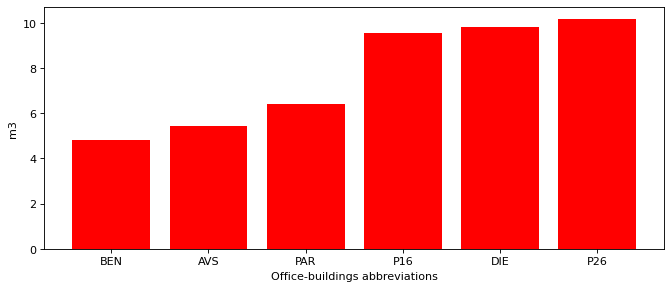

In [626]:
figure(figsize=(10, 4), dpi=80)
vals=dict(sorted(averages2.items(), key=lambda item: item[1]))
plt.bar(*zip(*vals.items()), color='red')
#plt.title("Average hourly energy consumption, per office-building (NSI)")
plt.xlabel("Office-buildings abbreviations")
plt.ylabel("m3")

In [490]:
gas_use.columns

Index(['DIEMEN_871687140000059765', 'BENNEK41_871687140021172443',
       'AVS_UTR_871689290604461476', 'P163063_871687140000067876',
       'P2639_871687140000067876', 'ROME_ADM_871687140007494125',
       'PARI_ADM_871687140007492466'],
      dtype='object')

<AxesSubplot:>

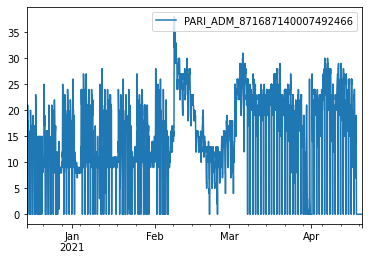

In [489]:
#meter has less data, last index is put in manually "21000"
col='PARI_ADM_871687140007492466'
index_first=gas_use[[col]].index.get_loc(gas_use[[col]].first_valid_index()) ##needs editing
gas_use[[col]].iloc[index_first-1:21000].plot()

In [ ]:
#change time resolution to 15T --> 15 minutes, at the moment it's taken per hour

# END OF EDIT